In [1]:
# Import required packages
import pandas as pd
import numpy as np

import squarify
import missingno as msno

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the automobile dataset and create the dataframe
vehicles_df = pd.read_csv('automobile.txt', sep=',')

# view the first 5 records 
vehicles_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
# Determine the shape of the dataframe
vehicles_df.shape

(205, 26)

In [3]:
# display the data types contained in the dataframe
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [4]:
# Display the summary statistics of the dataset
# When you use 'include = all' all the summary statistics will be shown even for features that a non-numeric
# It will just display NaN for the feature where a mean or standard deviation cannot be calculated.
# See, https://www.machinelearningplus.com/pandas/pandas-describe/
vehicles_df.describe(include= 'all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


<AxesSubplot:>

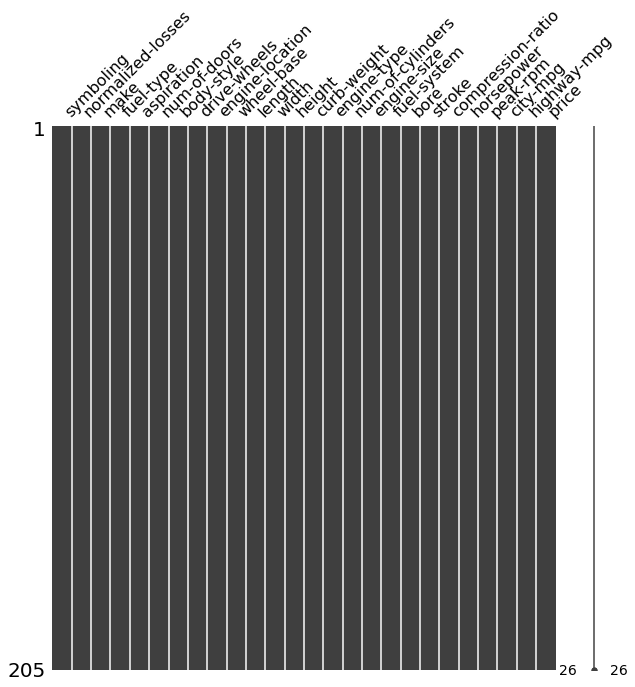

In [5]:
# Visualise the distribution of missing values within the dataframe
msno.matrix(vehicles_df, figsize=(10,10))

There are no missing values but the first rows of the dataframe indicated the presence of '?' values in certain columns. Take note that pandas does not register '?' as a missing value.

In [6]:
# Let us find the columns that have '?' values.
# Use isin() function to find the sum of '?' values in each column
vehicles_df.isin(['?']).sum(axis=0)

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
# Replace all the '?' with np.nan
vehicles_df.replace(to_replace = '?', value = np.nan, inplace= True)

# View if there are any remaining '?' values.
vehicles_df.isin(['?']).sum(axis=0)

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [8]:
# Convert the dtype of bore, stroke, horsepower, price and normalized-losses
# from object to float

# Define a dictionary where the keys are specific columns in the dataframe and the 
# value is the dtype to which the data values within the column will be converted.
dict = {'bore': float, 'stroke': float, 'horsepower': float,
       'normalized-losses': float, 'price': float, 'peak-rpm': float}

# astype() is a function that casts a DataFrame column to a defined dtype
vehicles_df = vehicles_df.astype(dict)
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [9]:
# The target variable is price. We want to see how a change in the other variables affects the price of a vehicle.
# Drop the 4 records that have a missing price value. 

vehicle_df = vehicles_df.dropna(subset=['price'], inplace=True)
vehicles_df['price'].isin([np.nan]).sum(axis=0)

0

In [10]:
# Replace np.nan with the mean of each column in the dataframe.
# That is, normalized losses, bore, stroke, horsepower, peak-rpm and num-of-doors
vehicles_df.replace(to_replace = '?', value = np.nan, inplace= True)

# Display the number of rows in each column that contain '?' values.
vehicles_df.isin(['?']).sum(axis=0)

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

<AxesSubplot:>

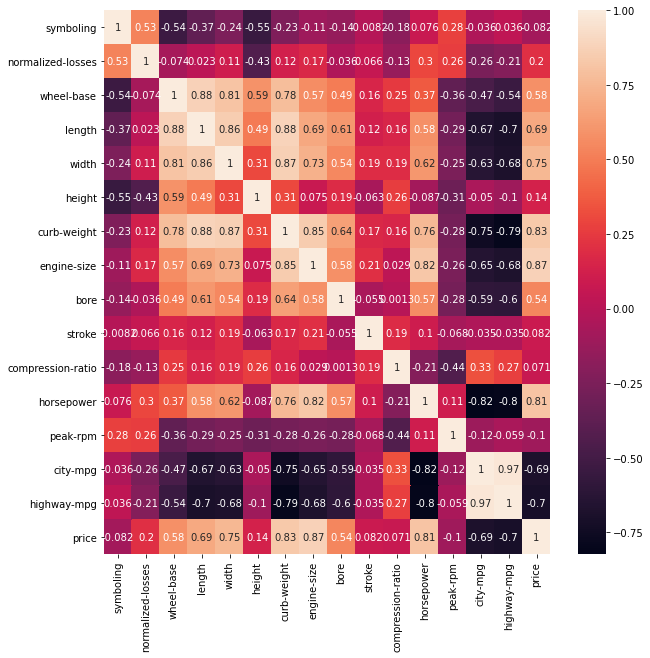

In [11]:
# Determine the correlation between the variables
corr = vehicles_df.corr()

# Visualise the correlation through a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot = True)


In [12]:
# Visualise the distribution of the data for the target and featured variables.
vehicles_df.skew()

symboling            0.197370
normalized-losses    0.765976
wheel-base           1.031261
length               0.154446
width                0.875029
height               0.029173
curb-weight          0.705804
engine-size          1.979144
bore                -0.032622
stroke              -0.693778
compression-ratio    2.584462
horsepower           1.141584
peak-rpm             0.107729
city-mpg             0.680433
highway-mpg          0.549507
price                1.809675
dtype: float64

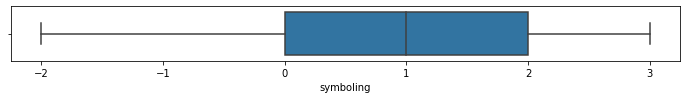

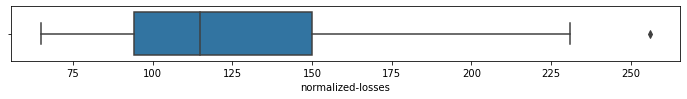

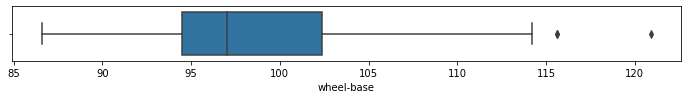

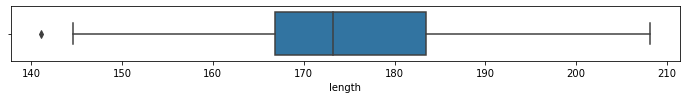

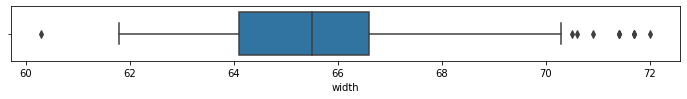

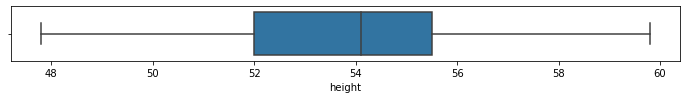

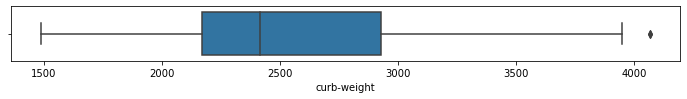

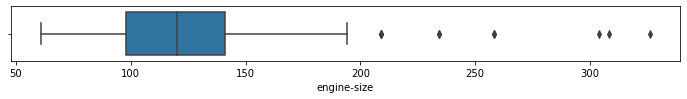

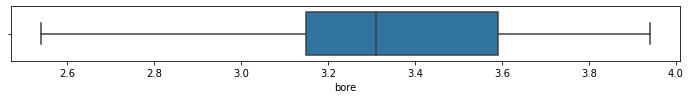

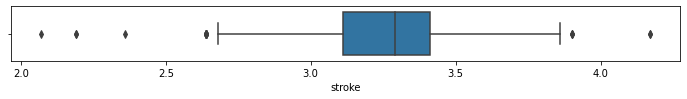

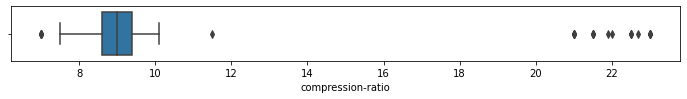

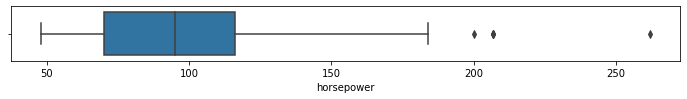

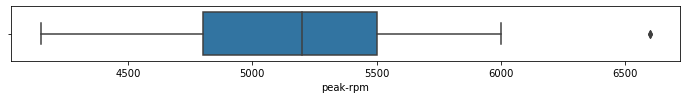

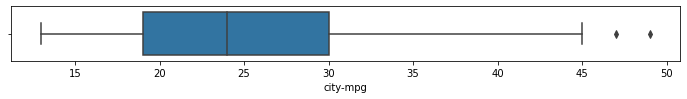

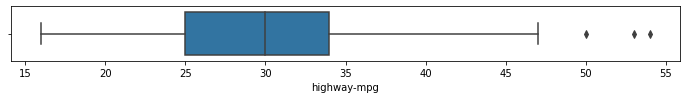

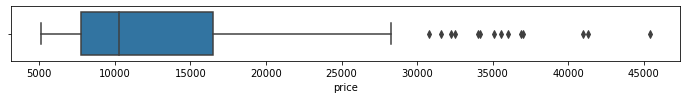

In [13]:
# Visualise the presense of outliers within each column of the dataframe
# See, https://stackoverflow.com/questions/51777217/how-to-plot-a-boxplot-for-each-column-in-a-dataframe
# Exclude the object variables by defining a new dataframe
vehicles_df1 = vehicles_df.select_dtypes(exclude=['object'])

for column in vehicles_df1:
    plt.figure(figsize=(12,1))
    sns.boxplot(data=vehicles_df1, x = column)

In [14]:
vehicles_df1.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,164.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
mean,0.840796,122.000000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,35.442168,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


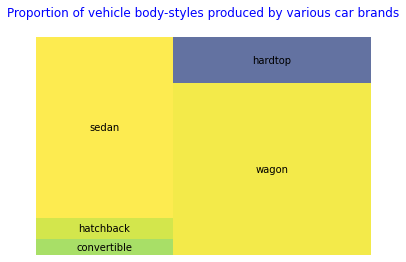

In [15]:
# Visualise the total number of brands that manufacture the different body-styles
# Treemap indicating the proportion of brands that manufacture the 
# different body types

type_vehicles = pd.DataFrame({'type' : vehicles_df['body-style'], 'make' : vehicles_df['make']})

# Group by 'Type'
type_count = type_vehicles.groupby('type').count()


squarify.plot(sizes=type_count['make'], label=vehicles_df['body-style'].unique(), alpha=.8)

# Remove axis
plt.axis('off')

# Display title.
plt.title(label= 'Proportion of vehicle body-styles produced by various car brands\n', 
         fontsize= 12, color= 'blue')

plt.show()


The automobile data set contains more Wagons and Sedans than Hatchbacks and Convertibles. This is evident because of the sizes of the rectangles in the above Treemap. The wagon square is much larger than the other body-styles.

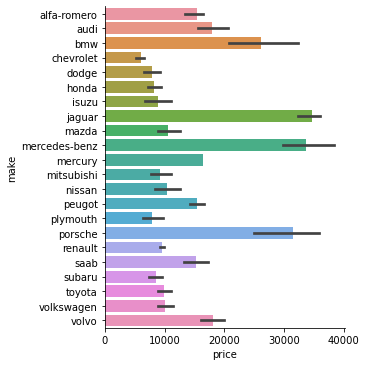

In [16]:
# Visualise the most expensive brands or make of vehicles.
sns.catplot(x = 'price', y = 'make', kind = 'bar', data = vehicles_df)

Jaguar manufactures the most expensive vehicles within this dataset. Chevrolet manufactures one of the cheaper vehicles within the data set. Jaguar, Mercedes-Benz, Porsche, BMW, Audi, Alfa Romeo, Volvo and Saab are amongst the manufacturers that make the most highly priced vehicles within the data set.

<AxesSubplot:xlabel='price', ylabel='horsepower'>

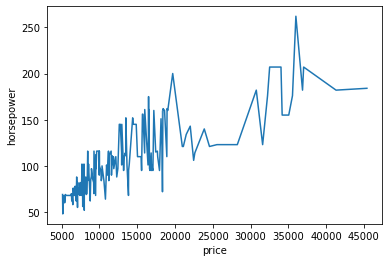

In [25]:
#View the relationship between of price and the horsepower of a vehicle
sns.lineplot(x = 'price', y = 'horsepower', data= vehicles_df)

The line graph above indicates that the higher the price of a vehicle the higher the horsepower. However the vehicle with the highest horsepower is not necessarily the most expensive. There are vehicles priced at 20000 or less with similar horsepower values to vehicles at a much higher price point.

<AxesSubplot:xlabel='price', ylabel='city-mpg'>

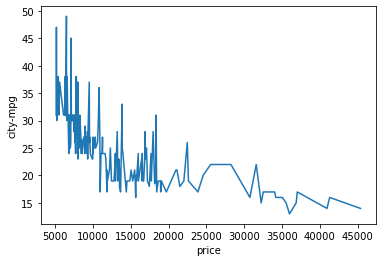

In [32]:
#visualise the reltationship between price and city-mpg
sns.lineplot(x='price', y ='city-mpg', data=vehicles_df)

The line graph above indicates a decrease in city-mpg as the price of a vehicle increases. Cheaper vehicles travel for more miles per gallon in the city than highly priced vehicles. Cheaper vehicles are more fuel efficient.

<AxesSubplot:xlabel='price', ylabel='highway-mpg'>

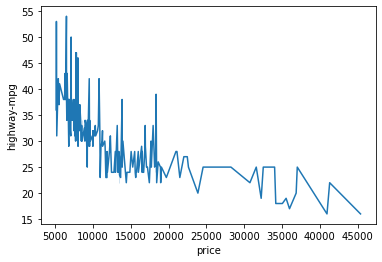

In [33]:
# Visualise the relationship between highway-mpg and price
sns.lineplot(x='price', y='highway-mpg', data = vehicles_df)

The line graph above indicates a decrease in highway-mpg as the price of a vehicle increases. Cheaper vehicles travel for more miles per gallon on the highway than highly priced vehicles. Cheaper vehicles are more fuel efficient.

In [17]:
# Bin the price values
min_value = vehicles_df['price'].min()
max_value = vehicles_df['price'].max()

# Define a sequence of prices that is evenly spaced 
bins = np.linspace(min_value, max_value, 3)
print(bins)
# Define the labels
labels = ['low-price', 'high-priced']

# Use the cut() method to segment and sort the price values into bins.
# Set include_lowest to True to include the minimum value.
vehicles_df['bins'] = pd.cut(vehicles_df['price'], bins = bins, labels = labels, include_lowest =True)


[ 5118. 25259. 45400.]


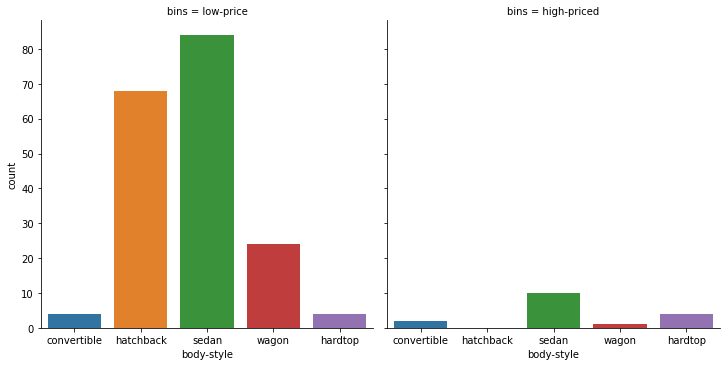

In [18]:
# Visualise the count of vehicles given the body-style and price
sns.catplot(data = vehicles_df, x = 'body-style', kind ='count', col = 'bins')

The automobile dataset contains more low-priced sedans than any other body-style. There are a few convertibles. There are only low-priced hatchbacks within the dataset.

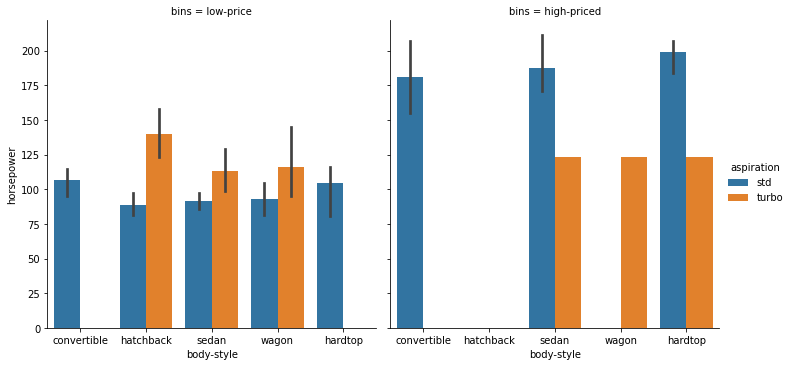

In [19]:
# Visualise the horsepower of highly priced vehicles and low priced vehicles
# Further indicate the distribution of the vehicles between gas and diesel
sns.catplot(data=vehicles_df, x = 'body-style', y = 'horsepower',kind = 'bar',
            hue = 'aspiration', col = 'bins')

High-priced vehicles have a greater horsepower than low priced vehicles. High-priced vehicles that are naturally aspirated have a greater horsepower than those that are turbo charged. Low-priced vehicles that are turbo charged have more horsepower than low-price vehicles that are naturaly aspirated. Turbo charged hatcbacks have more horsepower than any other vehicle in both low and high price range.

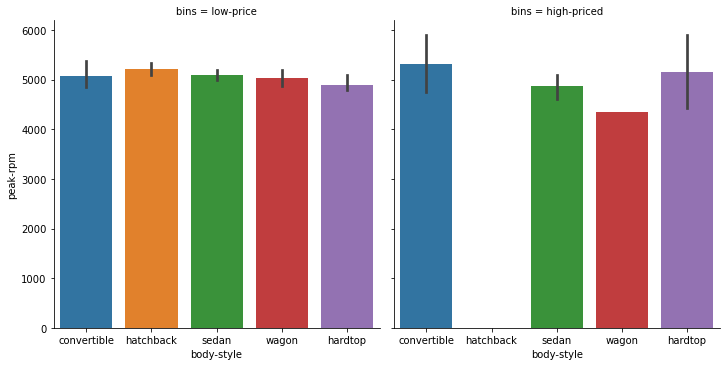

In [20]:
# Visualise the peak-rpm of each vehicle based on the body-style and price.
sns.catplot(data=vehicles_df, x='body-style', y='peak-rpm', kind='bar', col = 'bins')

Running at lower RPMs equates to higher torque and thus lower horsepower, while making higher RPM power outputs less torque and higher top horsepower

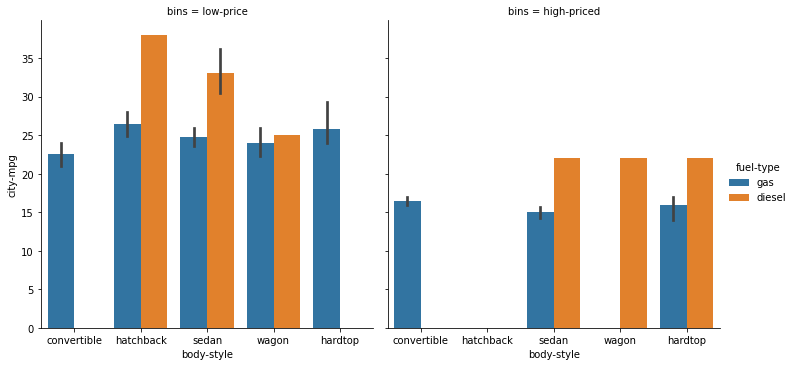

In [21]:
# Visualise the distribution of vehicles per body-style and their are fuel types

sns.catplot(data=vehicles_df, x='body-style', y='city-mpg',
    hue ='fuel-type', kind='bar', col= 'bins')


Diesel driven hatcbacks are the most fuel efficient vehicles becuase they have a high city-mpg and therefore can travel over the most miles per gallon. The least fuel efficient vehicle type is the high priced convertible and sedan which have low city-mpg. Low-priced vehicles that run on gas are more fuel efficient than high-price vehicles that run on either gas or diesel.

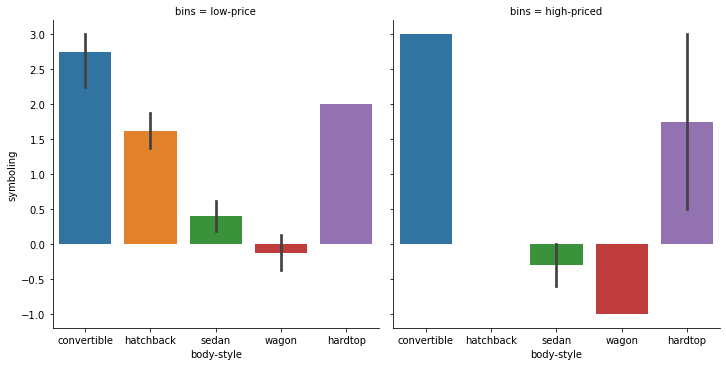

In [22]:
# Visualise the symboling of the vehicles based on body style and price
sns.catplot(data=vehicles_df, x = 'body-style', y = 'symboling', kind = 'bar',
           col = 'bins')

Each vehicle within the dataset is assigned a risk value between -3 and 3, where -3 is safe and +3 is risky. The dataset contains no vehicles that are assigned (-3) safe, the safest vehicles are high-priced wagons. The riskiest vehicles are convertibles regardless of the price. Sedans are less risky as the price of the vehicle increases

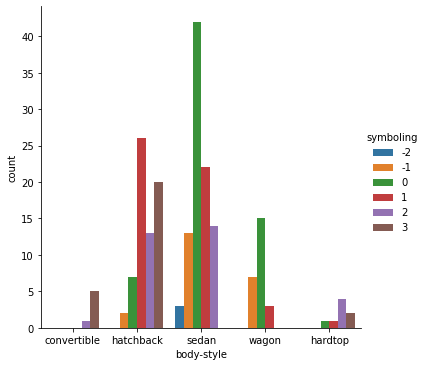

In [23]:
# Visualise symboling per body -style and price
sns.catplot(data=vehicles_df, x = 'body-style', kind = 'count', hue ='symboling')

The bar graph above indicates the number of vehicles per risk value. Convertibles are riskier and are assigned 2 or 3. A large number of sedans are neither risky nor safe, more data needs to be obtained to find the reason why they are assigned 0.

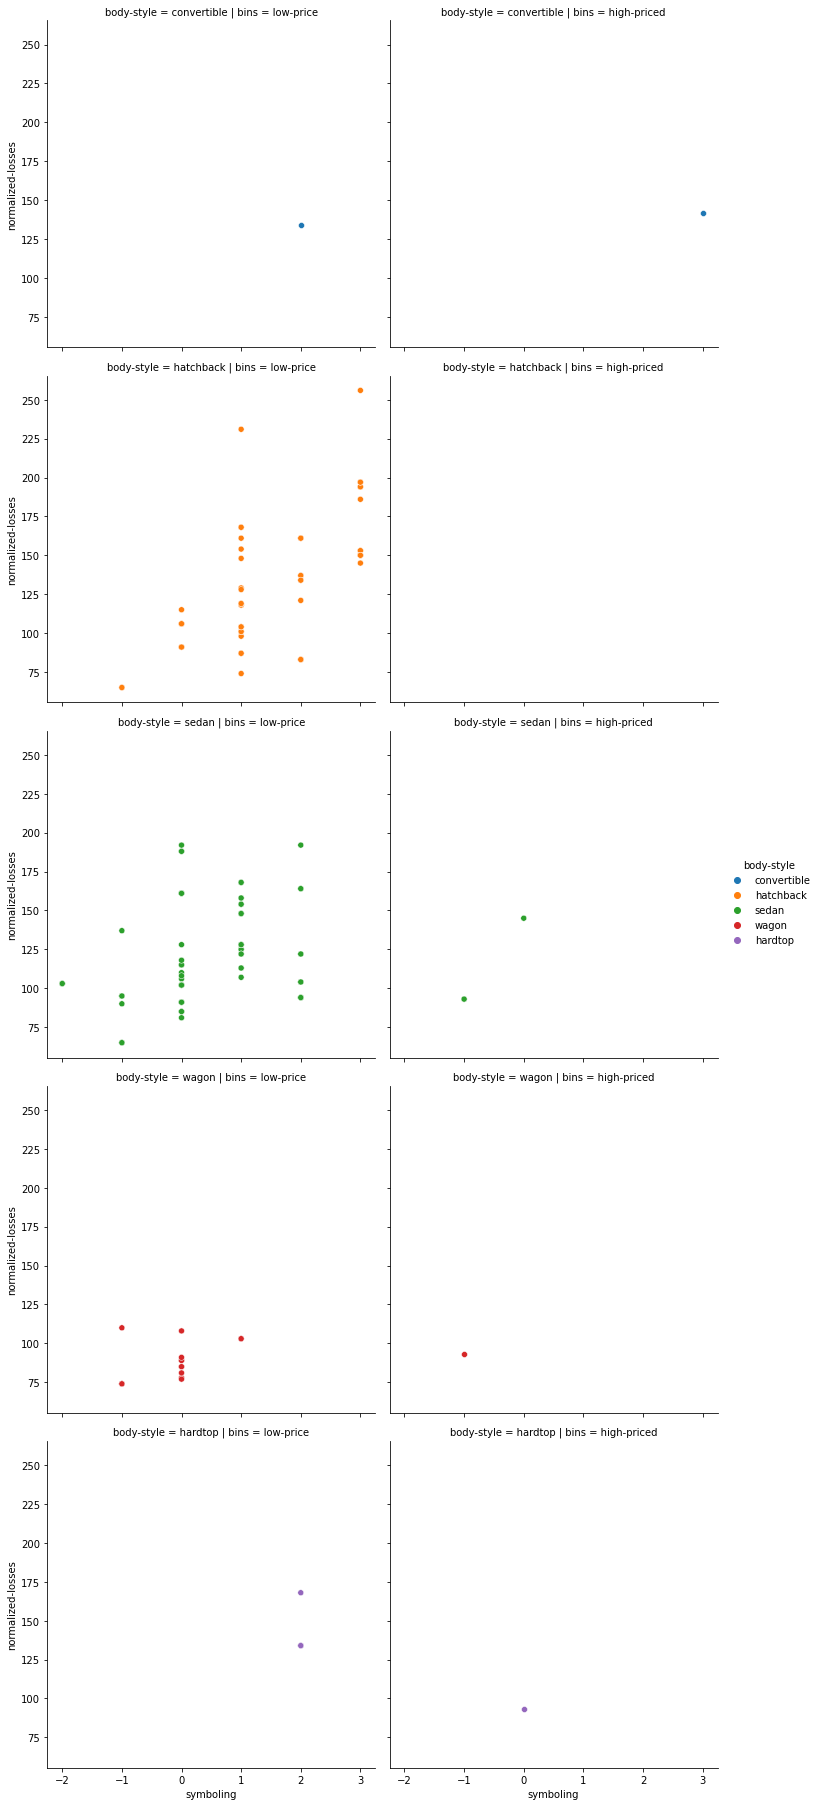

In [24]:
#Visualise the normalized-losses
sns.relplot(data = vehicles_df, x = 'symboling', y = 'normalized-losses', 
            kind = 'scatter', hue= 'body-style', row = 'body-style', col = 'bins')